In [19]:
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np

from numpy.fft import fft, fftshift
from numpy import cos, sin, pi

plt.rcParams.update({"axes.grid": True})

In [15]:
kf = int(75e3)  # Sensibilidade de frequência
Am = 1  # Amplitude da mensagem
fm = int(10e3)  # Frequência da mensagem
Ac = 1  # Amplitude da portadora
fc = int(150e3)  # Frequência da portadora

delta_f = kf * Am  # Desvio de frequência
beta = delta_f / fm  # Índice de modulação

fs = 50 * fc  # Frequência de amostragem
Ts = 1 / fs  # Período de amostragem
T = 1 / fm  # Período da mensagem
t = np.arange(0, 1, Ts)  # Eixo do tempo

m_t = cos(2 * pi * fm * t)  # Sinal mensagem
c_t = cos(2 * pi * fc * t)  # Sinal portadora
s_t = Ac * cos(2 * pi * fc * t + beta * sin(2 * pi * fm * t))  # Sinal modulado

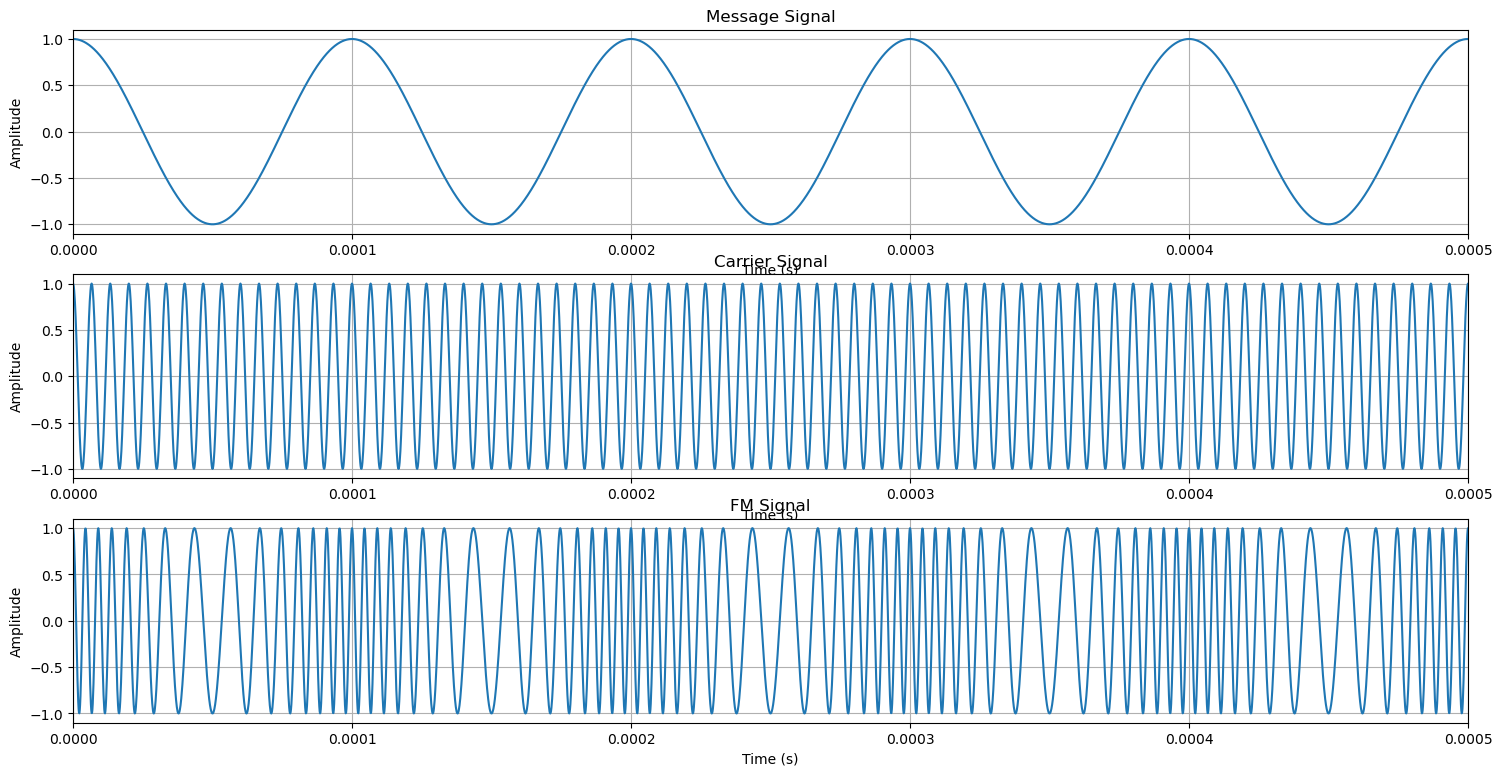

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(18, 9))

axs[0].plot(t, m_t)
axs[0].set_xlim(0, T * 5)
axs[0].set_title("Message Signal")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")

axs[1].plot(t, c_t)
axs[1].set_xlim(0, T * 5)
axs[1].set_title("Carrier Signal")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")

axs[2].plot(t, s_t)
axs[2].set_xlim(0, T * 5)
axs[2].set_title("FM Signal")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Amplitude")

plt.show()

In [17]:
f = np.arange(-fs / 2, fs / 2, 1)  # Eixo da frequência

M_f = fftshift(fft(m_t))  # Transformada de Fourier da mensagem
C_f = fftshift(fft(c_t))  # Transformada de Fourier da portadora
S_f = fftshift(fft(s_t))  # Transformada de Fourier do sinal modulado

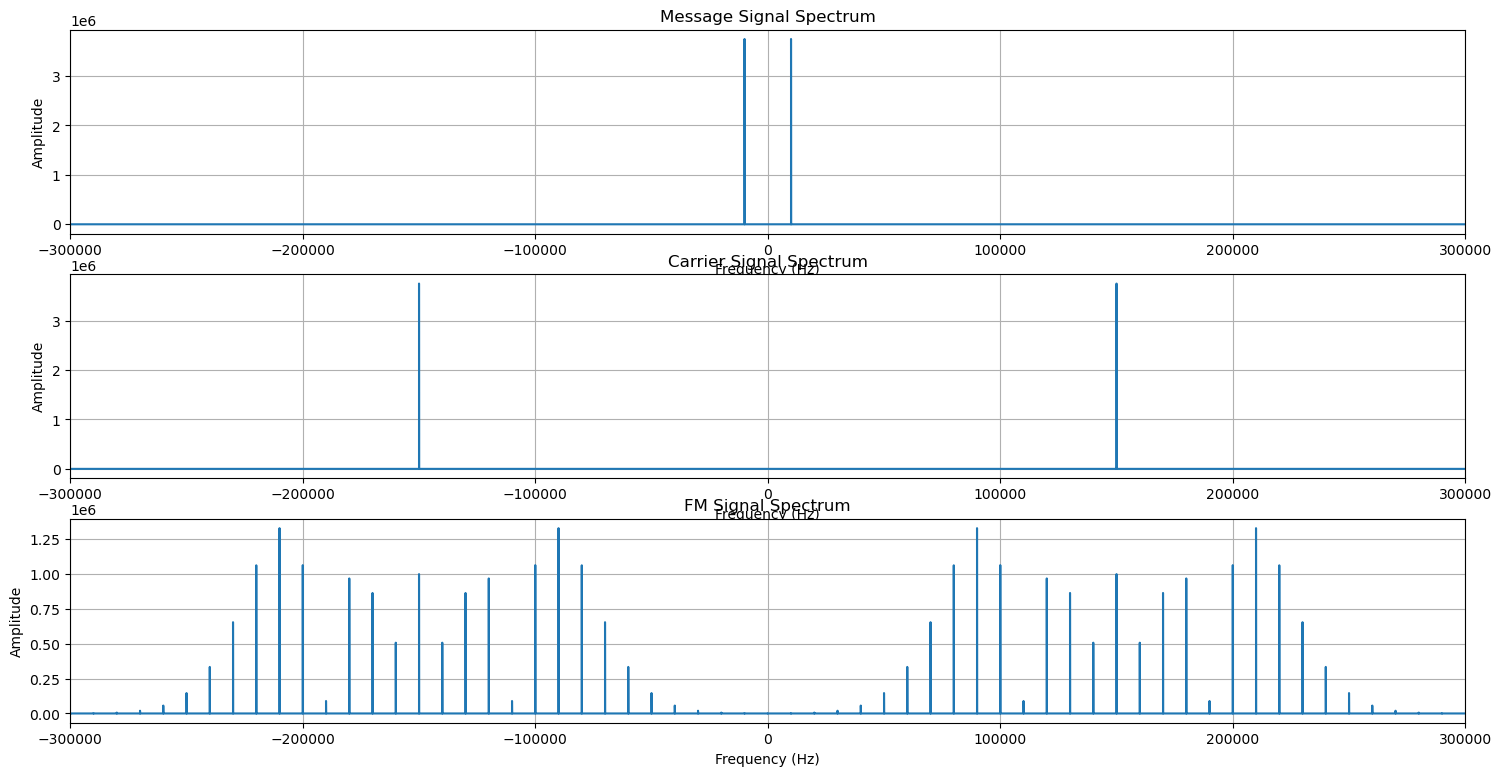

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(18, 9))

axs[0].plot(f, np.abs(M_f))
axs[0].set_title("Message Signal Spectrum")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Amplitude")
axs[0].set_xlim(-2 * fc, 2 * fc)

axs[1].plot(f, np.abs(C_f))
axs[1].set_title("Carrier Signal Spectrum")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Amplitude")
axs[1].set_xlim(-2 * fc, 2 * fc)

axs[2].plot(f, np.abs(S_f))
axs[2].set_title("FM Signal Spectrum")
axs[2].set_xlabel("Frequency (Hz)")
axs[2].set_ylabel("Amplitude")
axs[2].set_xlim(-2 * fc, 2 * fc)

plt.show()